In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt 
import seaborn as sns
import glob,os
import gc
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_curve 
from sklearn.metrics import classification_report

plt.rcParams['axes.unicode_minus'] = False

In [ ]:
# Read the data
def read_data(path):
    file=glob.glob(os.path.join(path, "*.csv"))
    print(file)
    
    int=1
    df1= pd.DataFrame()
    for f in file:
        df=pd.read_csv(f,index_col=None)
        # print(int)
        int+=1
        df1=pd.concat([df,df1])
        
    return df1


path1=r'/content/drive/My Drive/Smart_Data/Data'

data=read_data(path1)

['/content/drive/My Drive/Smart_Data/Data/20190701.csv', '/content/drive/My Drive/Smart_Data/Data/20190702.csv', '/content/drive/My Drive/Smart_Data/Data/20190703.csv', '/content/drive/My Drive/Smart_Data/Data/20190704.csv', '/content/drive/My Drive/Smart_Data/Data/20190705.csv', '/content/drive/My Drive/Smart_Data/Data/20190706.csv', '/content/drive/My Drive/Smart_Data/Data/20190707.csv', '/content/drive/My Drive/Smart_Data/Data/20190708.csv', '/content/drive/My Drive/Smart_Data/Data/20190709.csv', '/content/drive/My Drive/Smart_Data/Data/20190710.csv', '/content/drive/My Drive/Smart_Data/Data/20190711.csv', '/content/drive/My Drive/Smart_Data/Data/20190601.csv', '/content/drive/My Drive/Smart_Data/Data/20190602.csv', '/content/drive/My Drive/Smart_Data/Data/20190603.csv', '/content/drive/My Drive/Smart_Data/Data/20190604.csv', '/content/drive/My Drive/Smart_Data/Data/20190605.csv', '/content/drive/My Drive/Smart_Data/Data/20190606.csv', '/content/drive/My Drive/Smart_Data/Data/201906

In [ ]:
# Read the bad label data
data_bad=pd.read_csv(r'/content/drive/My Drive/Smart_Data/ssd_failure_label.csv')
data_bad

,model,failure_time,disk_id
0,MA2,2019-03-22 10:24:38,4711
1,MA2,2019-02-22 04:56:06,82064
2,MA2,2018-12-17 12:16:33,32311
3,MA2,2018-05-19 17:32:03,18316
4,MA2,2018-10-25 04:00:50,32466
...,...,...,...
16300,MC2,2019-09-30 09:09:55,15910
16301,MC2,2019-05-30 10:52:18,837
16302,MC2,2019-01-19 05:35:06,13236
16303,MC2,2019-07-18 23:14:27,277


In [ ]:
data.shape

(15485360, 71)

In [ ]:
# Check the missing value
count_nan=data.isnull().sum()

# Change the number of rows displayed
pd.set_option('display.max_rows', 1000)

print(count_nan)

disk_id           0
ds                0
model             0
n_1         6769470
r_1         6769470
n_5            1289
r_5            1289
n_9            1278
r_9            1278
n_12         245042
r_12         245042
n_170       4261949
r_170       4261949
n_171       3568454
r_171       3568454
n_172       3568493
r_172       3568493
n_173       6769483
r_173       6769483
n_174       3568489
r_174       3568489
n_177      12161943
r_177      12161943
n_180       3446134
r_180       3446134
n_181      12161957
r_181      12161957
n_182      12161950
r_182      12161950
n_183        938574
r_183        938574
n_184        245094
r_184        245094
n_187        245074
r_187        245074
n_188       7013265
r_188       7013265
n_190       8023707
r_190       8023707
n_192      12040592
r_192      12040592
n_194       1733310
r_194       1733310
n_195       3689868
r_195       3689868
n_196       6769517
r_196       6769517
n_197        245090
r_197        245090
n_198       7013274


In [ ]:
data=data.dropna(subset=["n_12","r_12","n_184","r_184"],axis=0)

In [ ]:
data=data.dropna(subset=["n_194","r_194","n_195","r_195"],axis=0)

In [ ]:
s=data["n_5"].mean()
data["n_5"]=data["n_5"].fillna(s)

s=data["r_5"].mean()
data["r_5"]=data["r_5"].fillna(s)

s=data["n_9"].mean()
data["n_9"].fillna(s, inplace = True)

s=data["r_9"].mean()
data["r_9"].fillna(s, inplace = True)

s=data["n_187"].mean()
data["n_187"].fillna(s, inplace = True)

s=data["r_187"].mean()
data["r_187"].fillna(s, inplace = True)

s=data["n_188"].mean()
data["n_188"].fillna(s, inplace = True)

s=data["r_188"].mean()
data["r_188"].fillna(s, inplace = True)

s=data["r_197"].mean()
data["r_197"].fillna(s, inplace = True)

s=data["n_197"].mean()
data["n_197"].fillna(s, inplace = True)

s=data["r_198"].mean()
data["r_198"].fillna(s, inplace = True)

s=data["n_198"].mean()
data["n_198"].fillna(s, inplace = True)

s=data["r_241"].mean()
data["r_241"].fillna(s, inplace = True)

s=data["n_241"].mean()
data["n_241"].fillna(s, inplace = True)

s=data["r_242"].mean()
data["r_242"].fillna(s, inplace = True)

s=data["n_242"].mean()
data["n_242"].fillna(s, inplace = True)

In [ ]:
count_nan1=data.isnull().sum()
count_nan1

disk_id           0
ds                0
model             0
n_1         1591393
r_1         1591393
n_5               0
r_5               0
n_9               0
r_9               0
n_12              0
r_12              0
n_170       2284780
r_170       2284780
n_171       1591333
r_171       1591333
n_172       1591334
r_172       1591334
n_173       1591332
r_173       1591332
n_174       1591329
r_174       1591329
n_177       8471755
r_177       8471755
n_180           205
r_180           205
n_181       8471757
r_181       8471757
n_182       8471756
r_182       8471756
n_183        693457
r_183        693457
n_184             0
r_184             0
n_187             0
r_187             0
n_188             0
r_188             0
n_190       7778301
r_190       7778301
n_192      10063070
r_192      10063070
n_194             0
r_194             0
n_195             0
r_195             0
n_196       1591342
r_196       1591342
n_197             0
r_197             0
n_198             0


In [ ]:
data=data.dropna(subset=["n_199","r_1","n_1","r_170","n_170","r_199"],axis=0)

In [ ]:
data=data.dropna(subset=["n_171","r_171","n_172","r_172","n_173","r_173","n_174","r_174","n_180","r_180","n_183","r_183",
                        "n_196","r_196" ,"n_206","r_206"],axis=0)
data.shape

(7777989, 71)

In [ ]:
count_nan1=data.isnull().sum()
count_nan1

disk_id          0
ds               0
model            0
n_1              0
r_1              0
n_5              0
r_5              0
n_9              0
r_9              0
n_12             0
r_12             0
n_170            0
r_170            0
n_171            0
r_171            0
n_172            0
r_172            0
n_173            0
r_173            0
n_174            0
r_174            0
n_177      7777989
r_177      7777989
n_180            0
r_180            0
n_181      7777989
r_181      7777989
n_182      7777989
r_182      7777989
n_183            0
r_183            0
n_184            0
r_184            0
n_187            0
r_187            0
n_188            0
r_188            0
n_190      7777989
r_190      7777989
n_192      7777989
r_192      7777989
n_194            0
r_194            0
n_195            0
r_195            0
n_196            0
r_196            0
n_197            0
r_197            0
n_198            0
r_198            0
n_199            0
r_199       

In [ ]:
# Two columns of data are empty delete processing
data=data.drop(['n_177','r_177','n_181','r_181','n_182','r_182','n_190','r_190','n_192','r_192',
               'n_233','r_233','n_244','r_244','n_245','r_245',
               'n_175','r_175','n_232','r_232'],axis=1)

In [ ]:
count_nan1=data.isnull().sum()
count_nan1

disk_id          0
ds               0
model            0
n_1              0
r_1              0
n_5              0
r_5              0
n_9              0
r_9              0
n_12             0
r_12             0
n_170            0
r_170            0
n_171            0
r_171            0
n_172            0
r_172            0
n_173            0
r_173            0
n_174            0
r_174            0
n_180            0
r_180            0
n_183            0
r_183            0
n_184            0
r_184            0
n_187            0
r_187            0
n_188            0
r_188            0
n_194            0
r_194            0
n_195            0
r_195            0
n_196            0
r_196            0
n_197            0
r_197            0
n_198            0
r_198            0
n_199            0
r_199            0
n_206            0
r_206            0
n_241            0
r_241            0
n_242            0
r_242            0
n_240      7777989
r_240      7777989
dtype: int64

In [ ]:
data=data.drop(['n_240','r_240'],axis=1)

In [ ]:
count_nan1=data.isnull().sum()
count_nan1

disk_id    0
ds         0
model      0
n_1        0
r_1        0
n_5        0
r_5        0
n_9        0
r_9        0
n_12       0
r_12       0
n_170      0
r_170      0
n_171      0
r_171      0
n_172      0
r_172      0
n_173      0
r_173      0
n_174      0
r_174      0
n_180      0
r_180      0
n_183      0
r_183      0
n_184      0
r_184      0
n_187      0
r_187      0
n_188      0
r_188      0
n_194      0
r_194      0
n_195      0
r_195      0
n_196      0
r_196      0
n_197      0
r_197      0
n_198      0
r_198      0
n_199      0
r_199      0
n_206      0
r_206      0
n_241      0
r_241      0
n_242      0
r_242      0
dtype: int64

In [ ]:
data.shape

(7777989, 49)

In [ ]:
# Reduce Memory
def reduce_mem(df):
    start_mem = df.memory_usage().sum() / 1024 ** 2
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
    end_mem = df.memory_usage().sum() / 1024 ** 2
    print('{:.2f} Mb, {:.2f} Mb ({:.2f} %)'.format(start_mem, end_mem, 100 * (start_mem - end_mem) / start_mem))
    gc.collect()
    return df

In [ ]:
data=reduce_mem(data)
data.info()

2967.07 Mb, 934.63 Mb (68.50 %)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7777989 entries, 0 to 383743
Data columns (total 49 columns):
 #   Column   Dtype  
---  ------   -----  
 0   disk_id  int32  
 1   ds       int32  
 2   model    object 
 3   n_1      float16
 4   r_1      float32
 5   n_5      float16
 6   r_5      float16
 7   n_9      float16
 8   r_9      float16
 9   n_12     float16
 10  r_12     float16
 11  n_170    float16
 12  r_170    float16
 13  n_171    float16
 14  r_171    float16
 15  n_172    float16
 16  r_172    float16
 17  n_173    float16
 18  r_173    float16
 19  n_174    float16
 20  r_174    float16
 21  n_180    float16
 22  r_180    float16
 23  n_183    float16
 24  r_183    float16
 25  n_184    float16
 26  r_184    float16
 27  n_187    float16
 28  r_187    float32
 29  n_188    float16
 30  r_188    float32
 31  n_194    float16
 32  r_194    float16
 33  n_195    float16
 34  r_195    float16
 35  n_196    float16
 36  r_196    float1

In [ ]:
# SMART sample time processing
data['ds'] = data['ds'].apply(lambda x:''.join(str(x)[0:4] +'-'+ str(x)[4:6]  +'-'+ str(x)[6:]))      
data['ds'] = pd.to_datetime(data['ds'])

In [ ]:
data_bad=reduce_mem(data_bad)
data_bad.info()

0.37 Mb, 0.31 Mb (16.66 %)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16305 entries, 0 to 16304
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   model         16305 non-null  object
 1   failure_time  16305 non-null  object
 2   disk_id       16305 non-null  int32 
dtypes: int32(1), object(2)
memory usage: 318.6+ KB


In [ ]:
# Bad Lable sample time processing

data_bad['failure_time'] =data_bad['failure_time'].astype(str).str[0:10]
data_bad['failure_time'] = pd.to_datetime(data_bad['failure_time'])
data_bad

,model,failure_time,disk_id
0,MA2,2019-03-22,4711
1,MA2,2019-02-22,82064
2,MA2,2018-12-17,32311
3,MA2,2018-05-19,18316
4,MA2,2018-10-25,32466
...,...,...,...
16300,MC2,2019-09-30,15910
16301,MC2,2019-05-30,837
16302,MC2,2019-01-19,13236
16303,MC2,2019-07-18,277


In [ ]:
data.shape

(7777989, 49)

In [ ]:
# Single data, eliminate processing
data=data.drop(['n_1','n_9','n_12','n_180','n_183','r_187',
               'n_188','n_195','n_196','n_197','n_198','n_199','n_206','n_174','n_187'],axis=1)

data.shape

(7777989, 34)

In [ ]:
# Remove outliers according to the box diagram above
data1=data.loc[data.r_12<=20000]
data1=data1.loc[data1.r_171<=2500]
data1=data1.loc[data1.r_174<=15000]
data1=data1.loc[data1.r_184<=500]

In [ ]:
data1.shape

(7777881, 34)

In [ ]:
# Bad disk mark
data1.loc[(data1['disk_id'].isin(data_bad['disk_id']))&(data1['model'].isin(data_bad['model']))&(data1['ds'].isin(data_bad['failure_time'])),'labels1'] = 1
data1['labels1']=data1['labels1'].fillna(0)
data1.head()

,disk_id,ds,model,r_1,n_5,r_5,r_9,r_12,n_170,r_170,n_171,r_171,n_172,r_172,n_173,r_173,r_174,r_180,r_183,n_184,r_184,r_188,n_194,r_194,r_195,r_196,r_197,r_198,r_199,r_206,n_241,r_241,n_242,r_242,labels1
0,0,2019-06-30,MC2,0.0,100.0,0.0,7136.0,21.0,100.0,0.0,100.0,0.0,100.0,0.0,100.0,8.0,11.0,7664.0,0.0,100.0,0.0,24.0,77.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,99.0,3.906363e+11,99.0,3.407953e+11,0.0
1,100,2019-06-30,MC1,0.0,100.0,0.0,17344.0,31.0,100.0,0.0,100.0,0.0,100.0,0.0,100.0,32.0,26.0,13360.0,0.0,100.0,0.0,1.0,74.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,99.0,3.906363e+11,99.0,3.407953e+11,0.0
3,100011,2019-06-30,MC1,0.0,100.0,0.0,20000.0,40.0,100.0,0.0,100.0,0.0,100.0,0.0,97.0,223.0,28.0,13360.0,0.0,100.0,0.0,20.0,76.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,99.0,3.906363e+11,99.0,3.407953e+11,0.0
4,100028,2019-06-30,MC1,0.0,100.0,0.0,15112.0,23.0,100.0,0.0,100.0,0.0,100.0,0.0,99.0,64.0,17.0,13360.0,0.0,100.0,0.0,20.0,77.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,99.0,3.906363e+11,99.0,3.407953e+11,0.0
5,100030,2019-06-30,MC1,0.0,100.0,0.0,15112.0,23.0,100.0,0.0,100.0,0.0,100.0,0.0,99.0,66.0,16.0,13360.0,0.0,100.0,0.0,18.0,78.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,99.0,3.906363e+11,99.0,3.407953e+11,0.0


In [ ]:
data1['labels1'].value_counts()

0.0    7187408
1.0     590473
Name: labels1, dtype: int64

In [ ]:
data2=data1.drop(['model','disk_id','ds'],axis=1)

In [ ]:
X=data2.drop(['labels1'],axis=1)
Y=data2['labels1']

In [ ]:
# Correlation coefficient
# The detected data were not presented in normal distribution, and spearman correlation coefficient was used to observe the data

spearman=X.corr(method="spearman")

spearman

,r_1,n_5,r_5,r_9,r_12,n_170,r_170,n_171,r_171,n_172,r_172,n_173,r_173,r_174,r_180,r_183,n_184,r_184,r_188,n_194,r_194,r_195,r_196,r_197,r_198,r_199,r_206,n_241,r_241,n_242,r_242
r_1,1.000000,-0.169871,0.403857,0.144015,-0.023907,-0.168259,0.403858,0.000795,0.039649,-0.003728,0.008752,-0.020516,0.013862,0.007524,-0.108345,0.012267,-0.024890,0.024765,0.003518,0.009040,-0.009038,0.546633,0.403858,0.001424,0.267811,0.017154,0.039649,NaN,NaN,NaN,NaN
n_5,-0.169871,1.000000,-0.175324,-0.050203,-0.005759,0.978439,-0.175289,0.058789,-0.010730,0.307702,-0.294637,-0.020727,0.021634,0.007010,0.144055,-0.009002,0.000738,-0.000722,-0.015935,-0.019396,0.019395,-0.144291,-0.175289,-0.014956,-0.223228,-0.011939,-0.010730,NaN,NaN,NaN,NaN
r_5,0.403857,-0.175324,1.000000,0.185589,0.064510,-0.171850,0.999996,-0.010319,0.646110,-0.054049,0.108040,-0.088186,0.090311,0.053621,-0.125192,0.010995,-0.031051,0.031020,0.032831,0.024867,-0.024864,0.222534,0.999996,0.006821,0.198100,0.009628,0.646110,NaN,NaN,NaN,NaN
r_9,0.144015,-0.050203,0.185589,1.000000,0.152747,-0.048770,0.185588,0.003312,0.097486,-0.001489,0.011632,-0.409685,0.443192,0.085236,0.134588,0.001313,-0.036347,0.036238,0.090570,0.089547,-0.089548,0.004657,0.185589,0.002034,0.072103,0.053469,0.097486,NaN,NaN,NaN,NaN
r_12,-0.023907,-0.005759,0.064510,0.152747,1.000000,-0.005441,0.064509,-0.002794,0.038001,-0.001219,0.003600,-0.092267,0.126190,0.864615,-0.013706,0.011909,-0.005270,0.005340,-0.015020,0.069971,-0.069973,0.016056,0.064509,-0.000900,-0.021255,0.038137,0.038001,NaN,NaN,NaN,NaN
n_170,-0.168259,0.978439,-0.171850,-0.048770,-0.005441,1.000000,-0.171851,0.058767,-0.010806,0.314556,-0.300844,-0.019883,0.020634,0.006840,0.141489,-0.009321,0.000836,-0.000820,-0.015177,-0.018604,0.018603,-0.145664,-0.171851,-0.014070,-0.219011,-0.012022,-0.010806,NaN,NaN,NaN,NaN
r_170,0.403858,-0.175289,0.999996,0.185588,0.064509,-0.171851,1.000000,-0.010319,0.646112,-0.054049,0.108041,-0.088187,0.090312,0.053620,-0.125191,0.010995,-0.031051,0.031020,0.032831,0.024866,-0.024864,0.222534,1.000000,0.006821,0.198101,0.009628,0.646112,NaN,NaN,NaN,NaN
n_171,0.000795,0.058789,-0.010319,0.003312,-0.002794,0.058767,-0.010319,1.000000,-0.013583,-0.000091,-0.036199,-0.000640,0.000268,-0.003194,0.009176,0.000164,-0.000110,0.000111,-0.000229,-0.000475,0.000475,0.000441,-0.010319,0.000013,-0.014488,0.000428,-0.013583,NaN,NaN,NaN,NaN
r_171,0.039649,-0.010730,0.646110,0.097486,0.038001,-0.010806,0.646112,-0.013583,1.000000,-0.002241,0.022665,-0.236571,0.245042,0.040628,0.054770,-0.001782,-0.002307,0.002480,0.001695,-0.005158,0.005158,0.007969,0.646112,0.002361,-0.016253,-0.002252,1.000000,NaN,NaN,NaN,NaN
n_172,-0.003728,0.307702,-0.054049,-0.001489,-0.001219,0.314556,-0.054049,-0.000091,-0.002241,1.000000,-0.478440,0.010832,-0.011756,-0.001468,0.045430,0.000858,-0.000576,0.000578,-0.003365,0.000572,-0.000572,-0.005699,-0.054049,0.000068,-0.001022,-0.002450,-0.002241,NaN,NaN,NaN,NaN


In [ ]:
X=X.drop(["r_242", 'n_242','r_241','n_241'],axis=1)

In [ ]:
# Normalisation

X = X.apply(lambda x: ((x - np.min(x)) / (np.max(x) - np.min(x))))
# Dimension reduction
# Feature engineering: Principal component analysis, PCA

pca=PCA(n_components=18)
pca.fit(X)
PCA_result=pca.transform(X)
X1=pd.DataFrame(PCA_result)
X1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.570832,0.189846,-0.209177,0.002406,-0.008879,-0.000199,0.000058,-0.000646,-0.000041,0.000799,-0.002975,-0.000066,0.000026,-0.000018,0.000028,0.000010,2.342511e-05,0.000342
1,-0.182836,0.100373,0.046384,-0.066602,-0.002832,-0.001393,-0.000220,0.000328,0.000106,0.000121,-0.000553,-0.000035,-0.000066,-0.000018,0.000120,-0.000019,5.743187e-06,-0.000040
2,-0.284573,0.176575,-0.009745,-0.026918,-0.004719,-0.001335,-0.000203,0.001161,0.000124,0.000181,-0.001077,-0.000039,-0.000084,-0.000028,0.000127,-0.000015,1.252776e-05,0.000307
3,-0.127379,0.010172,-0.034698,-0.038815,-0.002447,-0.000866,-0.000180,-0.000789,0.000002,-0.000972,0.003247,0.000015,-0.000051,-0.000028,0.000152,-0.000007,-2.582414e-06,0.000084
4,-0.132952,0.003809,-0.062984,-0.036593,-0.002705,-0.000862,-0.000172,-0.000851,0.000004,-0.000933,0.003096,0.000021,-0.000049,-0.000028,0.000156,-0.000005,4.096233e-06,0.000157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7777876,-0.141410,0.023962,-0.035045,-0.038534,-0.002659,-0.001071,-0.000172,0.005401,0.000053,-0.000508,0.001556,-0.000013,-0.000127,-0.000030,0.000139,0.000004,9.106739e-06,-0.000526
7777877,-0.091073,-0.038488,-0.055810,0.050088,-0.001908,0.000015,-0.000103,0.000164,-0.000032,-0.000886,0.002338,-0.000027,-0.000030,-0.000035,0.000089,-0.000013,-2.087874e-06,0.000260
7777878,-0.123412,0.028928,0.026233,0.026291,-0.001754,-0.000401,-0.000133,-0.000068,0.000004,0.001015,-0.001837,-0.000068,-0.000020,-0.000022,-0.000014,-0.000020,9.771921e-06,0.000264
7777879,0.026125,-0.094347,0.084199,-0.007323,0.000895,-0.000243,-0.000136,-0.001526,-0.000043,0.000784,-0.000719,-0.000062,0.000013,-0.000011,-0.000030,-0.000002,-4.760663e-07,0.000108


In [ ]:
X1.shape

(7777881, 18)

In [ ]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X1,Y,test_size=0.3)

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

Rfc = RandomForestClassifier(n_estimators=100, random_state=90)

Rfc = Rfc.fit(Xtest, Ytest)
score_Rfc=Rfc.score(Xtest, Ytest)
y_pred_Rfc = Rfc.predict(Xtest)

In [ ]:
print('Percision',score_Rfc)
print('The result of Predict',y_pred_Rfc)

Percision 0.9973673214434947
The result of Predict [0. 0. 0. ... 0. 0. 0.]


In [ ]:
from sklearn.metrics import confusion_matrix,roc_curve,auc,precision_recall_curve,average_precision_score,roc_auc_score
from sklearn.model_selection import learning_curve
from sklearn.metrics import recall_score

In [ ]:
# Visual confusion matrix
def confusion_metrix(y,y_p,Confusion_matrix):
# y is the true value, y_p is the predicted value
    plt.matshow(Confusion_matrix)
    plt.title("Confusion Matrix")
    plt.colorbar()
    plt.ylabel("Actual type")
    plt.xlabel("Predict Type")

In [ ]:
#Confusion Matrix
confusion_matrix_Rfc=confusion_matrix(Ytest, y_pred_Rfc,  sample_weight=None)

confusion_matrix_Rfc

array([[2154678,     959],
       [   5184,  172544]])

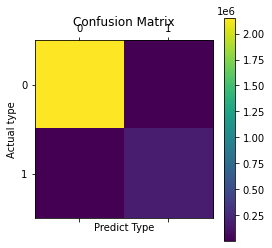

In [ ]:
confusion_metrix(Ytest,y_pred_Rfc,confusion_matrix_Rfc)

In [ ]:
#Roc Curve
def roc(y,y_p):
    fpr, tpr, thresholds_keras = roc_curve(y,y_p)
    auc_value = auc(fpr, tpr)
    print("AUC : ", auc_value)
    plt.figure()
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label='Keras (area = {:.3f})'.format(auc_value))
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')


AUC :  0.9851934764075645


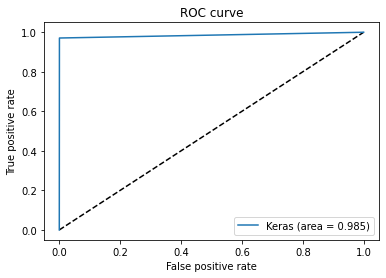

In [ ]:
roc(Ytest,y_pred_Rfc)

In [ ]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

nby = GaussianNB()
nby = nby.fit(Xtrain,Ytrain)

score_nby = nby.score(Xtest, Ytest)
y_pred_nby = nby.predict(Xtest)

In [ ]:
print('Precision',score_nby)
print('The Result of Predict',y_pred_nby)

Precision 0.8466039389465428
The Result of Predict [0. 0. 0. ... 0. 0. 0.]


In [ ]:
confusion_matrix_nby=confusion_matrix(Ytest, y_pred_nby,  sample_weight=None)

confusion_matrix_nby

array([[1921262,  234375],
       [ 123554,   54174]])

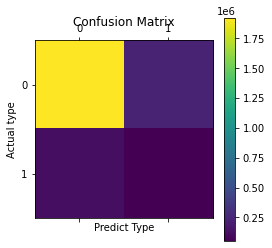

In [ ]:
confusion_metrix(Ytest,y_pred_nby,confusion_matrix_nby)

AUC :  0.5980437679574747


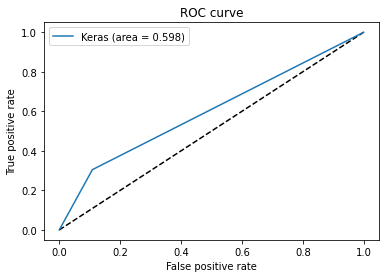

In [ ]:
roc(Ytest, y_pred_nby)

In [ ]:
# XGBoost Model
from xgboost import XGBClassifier

xgb = XGBClassifier(max_depth=6, learning_rate=1, silent=True, objective='binary:logistic')
xgb = xgb.fit(Xtrain,Ytrain)

score_xgb = xgb.score(Xtest, Ytest)
y_pred_xgb = xgb.predict(Xtest)

In [ ]:
print('Precision',score_xgb)
print('The Result of Predict',y_pred_xgb)

Precision 0.9322836332935481
The Result of Predict [0. 0. 0. ... 0. 0. 0.]


In [ ]:
confusion_matrix_xgb=confusion_matrix(Ytest, y_pred_xgb,  sample_weight=None)
confusion_matrix_xgb

array([[2148769,    6868],
       [ 151139,   26589]])

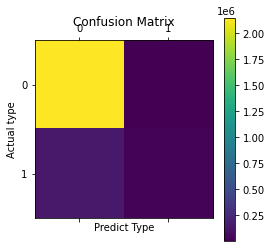

In [ ]:
confusion_metrix(Ytest,y_pred_xgb,confusion_matrix_xgb)

AUC :  0.5732094746088665


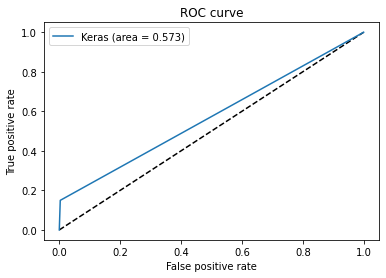

In [ ]:
roc(Ytest, y_pred_xgb)